# Mobile Price Classification

## Problem Statement:

PT.ABC ingin membuka scope  bisnis IT  dengan memulai bisnis penjualan Ponsel, namun perusahaan ini masih terkendala dalam melakukan penetapan harga ponsel berdasarkan spesifikasinya. oleh karena itu tim Data Scientist diminta untuk mengumpulkan data range harga penjualan-penjualan ponsel dari kompetitor perusahaan.

## Goals :

Dapat mengetahui jenis ponsel yang paling diminati dan dapat menetapkan harga ponsel berdasarkan spesifikasi ponsel tersebut.


## Data Explanation 
- battery_power:Total energy a battery can store in one time measured in mAh
- blue:Has bluetooth or not
- clock_speed:speed at which microprocessor executes instructions
- dual_sim:Has dual sim support or not
- fc:Front Camera mega pixels
- four_g:Has 4G or not
- int_memory:Internal Memory in Gigabytes
- m_dep:Mobile Depth in cm
- mobile_wt:Weight of mobile phone
- n_cores:Number of cores of processor
- pc:Primary Camera mega pixels
- px_height:Pixel Resolution Height
- px_width:Pixel Resolution Width
- ram:Random Access Memory in Megabytes
- sc_h:Screen Height of mobile in cm
- sc_w:Screen Width of mobile in cm
- talk_time:longest time that a single battery charge will last when you are
- three_g:Has 3G or not
- touch_screen:Has touch screen or not
- wifi:Has wifi or not
- price range = price range mobile

## Importing Common Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

%matplotlib inline

In [2]:
#untuk melihat versi dari pandas, matplotlib, dan seaborn
print('pandas version:', pd.__version__,'per Oktober 2020')
print('matplotlib version:', matplotlib.__version__,'per Oktober 2020')
print('seaborn version:', sns.__version__,'per Oktober 2020')

pandas version: 1.0.1 per Oktober 2020
matplotlib version: 3.1.3 per Oktober 2020
seaborn version: 0.10.0 per Oktober 2020


## Read Data

In [3]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data_describe =[]

for i in df.columns: 
    data_describe.append([ #add i, type data, how many NaN, percentage , how many unique, unique value 
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique() 
    ])

In [7]:
pd.DataFrame(data=data_describe, columns=['Data','Data Types','Null','Null Percentage','Unique','Unique Sample'])


,Data,Data Types,Null,Null Percentage,Unique,Unique Sample
0,battery_power,int64,0,0.0,1094,"[842, 1021, 563, 615, 1821, 1859, 1954, 1445, ..."
1,blue,int64,0,0.0,2,"[0, 1]"
2,clock_speed,float64,0,0.0,26,"[2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, ..."
3,dual_sim,int64,0,0.0,2,"[0, 1]"
4,fc,int64,0,0.0,20,"[1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8..."
5,four_g,int64,0,0.0,2,"[0, 1]"
6,int_memory,int64,0,0.0,63,"[7, 53, 41, 10, 44, 22, 24, 9, 33, 17, 52, 46,..."
7,m_dep,float64,0,0.0,10,"[0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, ..."
8,mobile_wt,int64,0,0.0,121,"[188, 136, 145, 131, 141, 164, 139, 187, 174, ..."
9,n_cores,int64,0,0.0,8,"[2, 3, 5, 6, 1, 8, 4, 7]"


In [8]:
#untuk mengecek informasi dari jumlah kolom, baris dan nama kolom
print("Jumlah Kolom: ",df.shape[1]) #indexing 1
print("Jumlah Baris: ",df.shape[0]) #indexing 0
print("Daftar kolom: ", df.columns)

Jumlah Kolom:  21
Jumlah Baris:  2000
Daftar kolom:  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


dari keterangan data tersebut, ada beberapa kolom yang janggal yaitu kolom px_height dan sc_h dibilang janggal karena adalah tidak mungkin jika resolusi nilainya 0 pada px_height dan tidak mungkin juga panjang screen adalah 0, sehingga tim data science PT. ABC akan melakukan pengecekan secara mendalam

In [10]:
# berdasarkan link tersebut, https://www.leskompi.com/ukuran-jenis-resolusi-layar-hp/ paling kecil adalah 240, sehingga data yang nanti digunakan adalah ukuran smartphone rentan resolusinya dari 240 - 1960

data = df[df['px_height']>=240]
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [11]:
# berdasarkan link tersebut https://screensiz.es/ ukuran lebar paling kecil adalah 2, sehingga data yang nanti akan digunakan adalah spesikasi minimal hp yang memiliki lebar 2cm
datafix = data[data['sc_w']>=2]
datafix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## Checking Outliers & Correlation

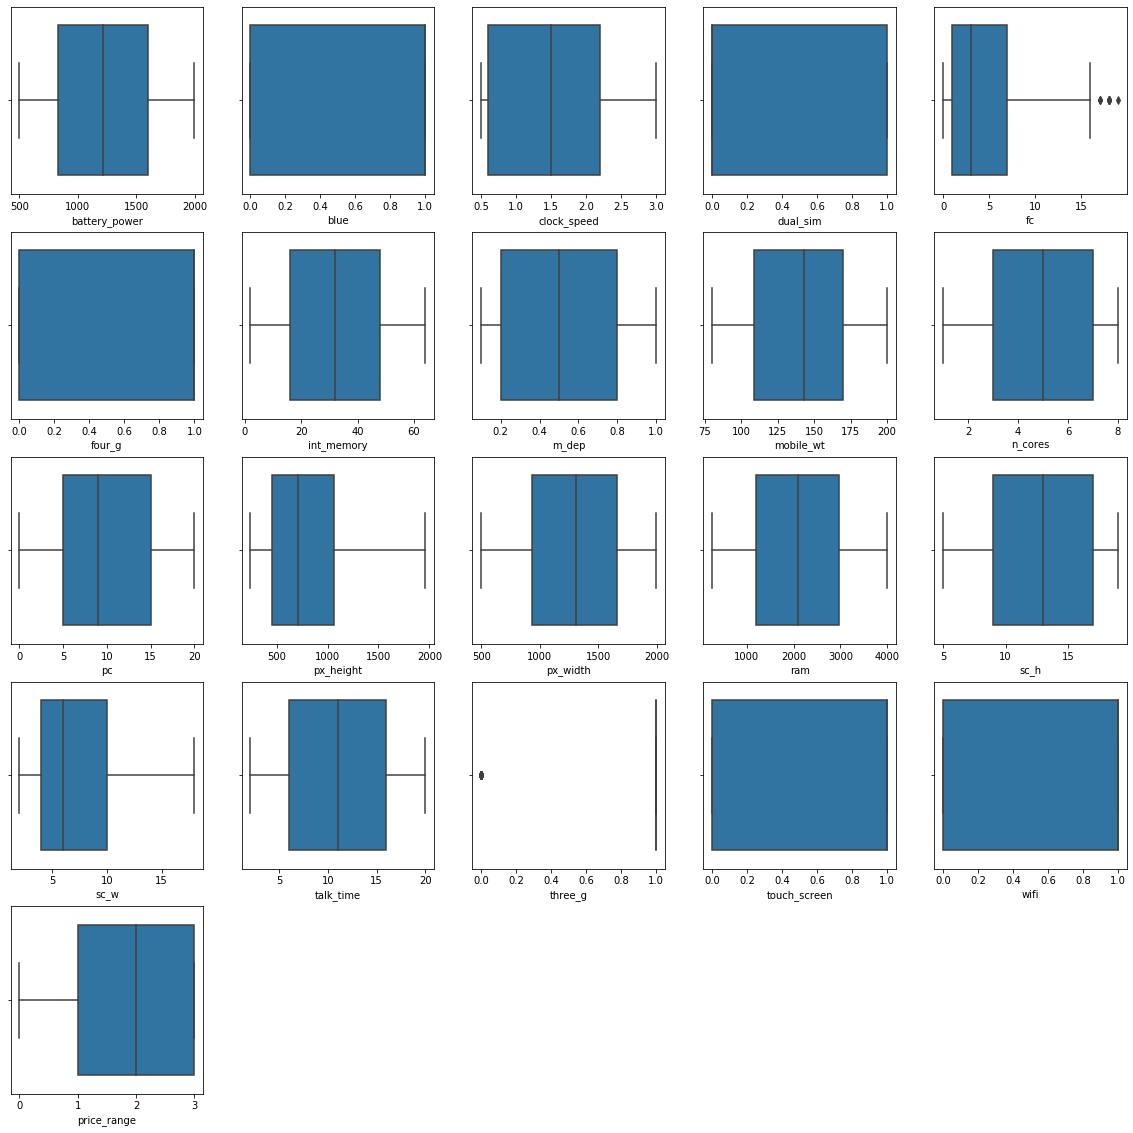

In [12]:

plt.figure(figsize =(20, 20 ))
x = 1 

for column in datafix.columns:
    plt.subplot(5,5,x)
    sns.boxplot(datafix[column])
    x+=1
plt.tight_layout
plt.show()

Dari hasil pengecekan outliers, terdapat 3 kolom yang memiliki outliers yaitu di kolom three_g, dan kolom fc.

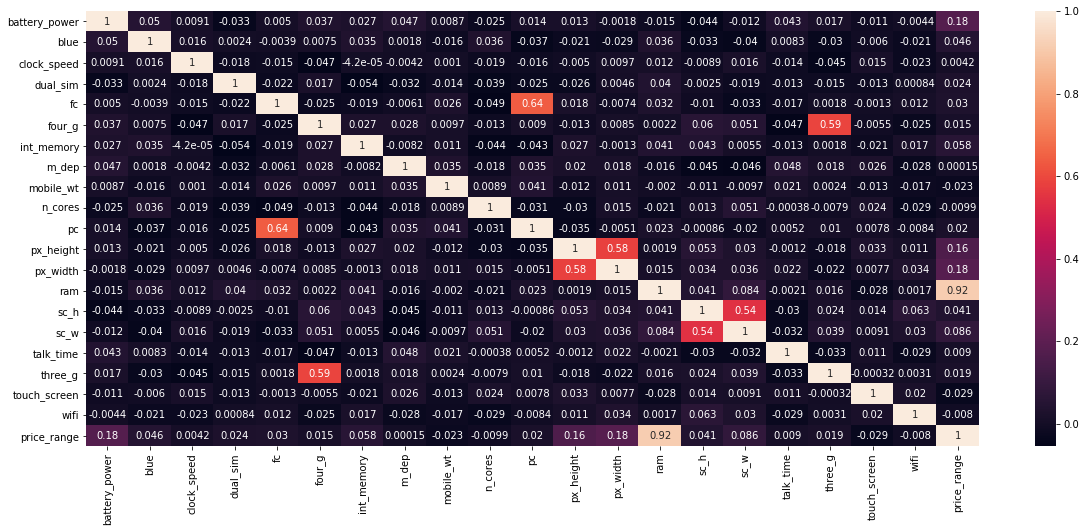

In [13]:
plt.figure(figsize = (20, 8))
sns.heatmap(datafix.corr(), annot = True)
plt.show()

Dapat dilihat dari pengecekan korelasi pada dataset tersebut:

- kolom Price range dengan kolom ram memiliki korelasi yang sangat tinggi, yaitu 0.92
- kolom fc dan pc memiliki korelasi yang cukup tinggi, yaitu 0.64
- kolom four_g dan kolom three_g memiliki korelasi yang cukup tinggi, yaitu 0.59
- kolom px_height dan kolom px_width memiliki korelasi yang cukup tinggi, yaitu 0.58
- kolom sc_h dan kolom sc_w memiliki korelasi yang cukup tinggi, yaitu 0.54


## Feature Engineering For EDA


    

### a. Melakukan kategorisasi pada kolom PC

In [14]:
bin_pc = [-0.1,0, 5, 10, 15, datafix['pc'].max()]
label = ['no camera','low','average','high','very high']

datafix['cat_pc'] = pd.cut(datafix['pc'], bins= bin_pc, labels =label)
datafix.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cat_pc
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,average
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,average
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,average
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,high
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,average


### b. Melakukan kategorisasi pada kolom FC

In [15]:
bin_fc = [-0.1,0, 5, 10, 15, datafix['fc'].max()]
label = ['no camera','low','average','high','very high']

datafix['cat_fc'] = pd.cut(datafix['fc'], bins= bin_fc, labels =label)
datafix.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cat_pc,cat_fc
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,average,no camera
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,average,low
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,average,no camera
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,high,high
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,average,low


### c. Melakukan kategorisasi pada kolom Ram

In [16]:
bin_ram = [0, 1000, 2000, 3000, datafix['ram'].max()]
label = ['<1Gb','1-2Gb','2-3Gb','3-4Gb']

datafix['cat_ram'] = pd.cut(datafix['ram'], bins= bin_ram, labels =label)
datafix.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cat_pc,cat_fc,cat_ram
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,average,no camera,2-3Gb
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,average,low,2-3Gb
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,average,no camera,2-3Gb
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,high,high,1-2Gb
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,average,low,3-4Gb


### d. Melakukan kategorisasi pada kolom battery

In [17]:
bin_bat = [500, 1000, 1500, datafix['ram'].max()]
label = ['low','normal','super saver']

datafix['cat_battery'] = pd.cut(datafix['battery_power'], bins= bin_bat, labels =label)
datafix.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cat_pc,cat_fc,cat_ram,cat_battery
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,average,no camera,2-3Gb,normal
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,average,low,2-3Gb,low
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,average,no camera,2-3Gb,low
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,high,high,1-2Gb,super saver
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,average,low,3-4Gb,super saver


### e. melakukan kategorisasi pada kolom memory

In [18]:
bin_memory = [0, 16, 32, 48, datafix['ram'].max()]
label = ['<16','17-32','33-48','49<']

datafix['cat_memory'] = pd.cut(datafix['int_memory'], bins= bin_memory, labels =label)
datafix.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cat_pc,cat_fc,cat_ram,cat_battery,cat_memory
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,average,no camera,2-3Gb,normal,49<
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,average,low,2-3Gb,low,33-48
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,average,no camera,2-3Gb,low,<16
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,high,high,1-2Gb,super saver,33-48
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,average,low,3-4Gb,super saver,<16


### f. melakukan kategorisasi pada kolom n_cores 

In [19]:
bin_core = [0, 3, 6, datafix['ram'].max()]
label = ['low','standard','high']

datafix['cat_core'] = pd.cut(datafix['n_cores'], bins= bin_core, labels =label)
datafix.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cat_pc,cat_fc,cat_ram,cat_battery,cat_memory,cat_core
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,average,no camera,2-3Gb,normal,49<,low
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,average,low,2-3Gb,low,33-48,standard
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,average,no camera,2-3Gb,low,<16,standard
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,high,high,1-2Gb,super saver,33-48,low
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,average,low,3-4Gb,super saver,<16,high


### g. melakukan kategorisasi pada kolom clock speed

In [20]:
bin_clock = [0, 1.3, 2.1, datafix['ram'].max()]
label = ['low','standard','high']

datafix['cat_cs'] = pd.cut(datafix['clock_speed'], bins= bin_clock, labels =label)
datafix.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cat_pc,cat_fc,cat_ram,cat_battery,cat_memory,cat_core,cat_cs
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,average,no camera,2-3Gb,normal,49<,low,low
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,average,low,2-3Gb,low,33-48,standard,low
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,average,no camera,2-3Gb,low,<16,standard,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,high,high,1-2Gb,super saver,33-48,low,low
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,average,low,3-4Gb,super saver,<16,high,standard


### h. melakukan kategorisasi pada kolom talk time

In [21]:
bin_talk = [0, 7, 13, datafix['ram'].max()]
label = ['low','standard','high']

datafix['cat_talk'] = pd.cut(datafix['talk_time'], bins= bin_talk, labels =label)
datafix.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cat_pc,cat_fc,cat_ram,cat_battery,cat_memory,cat_core,cat_cs,cat_talk
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,average,no camera,2-3Gb,normal,49<,low,low,low
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,average,low,2-3Gb,low,33-48,standard,low,standard
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,average,no camera,2-3Gb,low,<16,standard,high,standard
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,high,high,1-2Gb,super saver,33-48,low,low,high
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,average,low,3-4Gb,super saver,<16,high,standard,high


## Exploratory Data Analysis

In [22]:
datafix.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,1230.645719,0.509819,1.506520,0.499607,4.245876,0.529458,32.130401,0.505027,140.627651,4.556952,9.783189,788.940299,1294.813826,2098.439906,12.881383,7.098193,10.890024,0.762765,0.512962,0.532600,1.521603
std,443.399941,0.500100,0.811724,0.500196,4.316857,0.499328,18.083279,0.288168,35.485176,2.277543,5.972695,401.202183,423.185601,1079.880321,4.107928,3.960767,5.532111,0.425555,0.500028,0.499132,1.110858
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,240.000000,500.000000,258.000000,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,834.000000,0.000000,0.600000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,457.000000,935.000000,1203.000000,9.000000,4.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1216.000000,1.000000,1.500000,0.000000,3.000000,1.000000,32.000000,0.500000,143.000000,5.000000,9.000000,706.000000,1308.000000,2101.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1603.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,1064.000000,1659.000000,2977.000000,17.000000,10.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1997.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1997.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [40]:
datafix.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'cat_pc', 'cat_fc', 'cat_ram',
       'cat_battery', 'cat_memory', 'cat_core', 'cat_cs', 'cat_talk',
       'kamera'],
      dtype='object')

### Univariate Analysis

In [24]:
datafix.stb.freq(['touch_screen'], cum_cols =False)

,touch_screen,count,percent
0,1,653,51.296151
1,0,620,48.703849


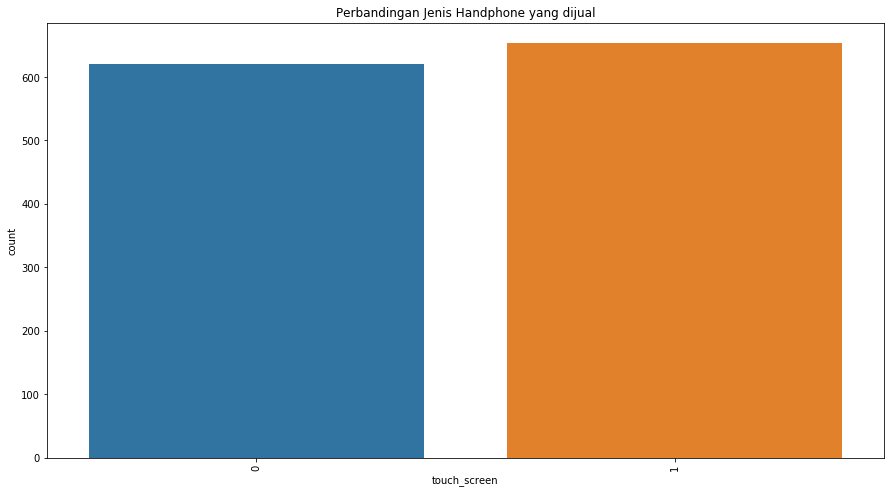

In [25]:
plt.figure(figsize = (15, 8))
sns.countplot(datafix['touch_screen'])
plt.xticks(rotation = 90)
plt.title('Perbandingan Jenis Handphone yang dijual')
plt.show()

In [26]:
cam = datafix
bin_cam = [-0.1, 0, datafix['pc'].max()]
label = ['No Camera',' Camera']

cam['kamera'] = pd.cut(datafix['pc'], bins= bin_cam, labels =label)
cam.stb.freq(['kamera'], cum_cols =False)

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,kamera,count,percent
0,Camera,1210,95.05106
1,No Camera,63,4.94894


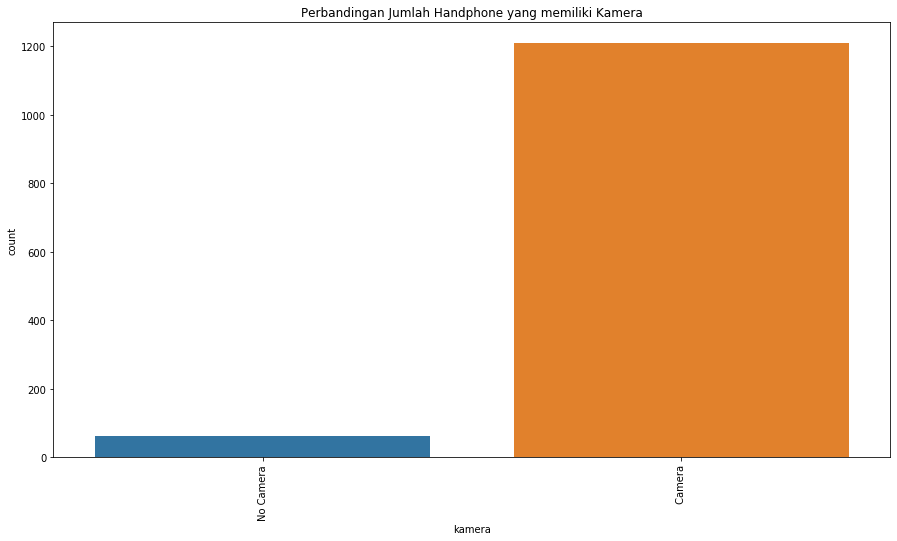

In [27]:
plt.figure(figsize = (15, 8))
sns.countplot(cam['kamera'])
plt.xticks(rotation = 90)
plt.title('Perbandingan Jumlah Handphone yang memiliki Kamera')
plt.show()

In [23]:
datafix.stb.freq(['price_range'], cum_cols =False)

,price_range,count,percent
0,1,332,26.080126
1,3,325,25.530244
2,2,315,24.744698
3,0,301,23.644933


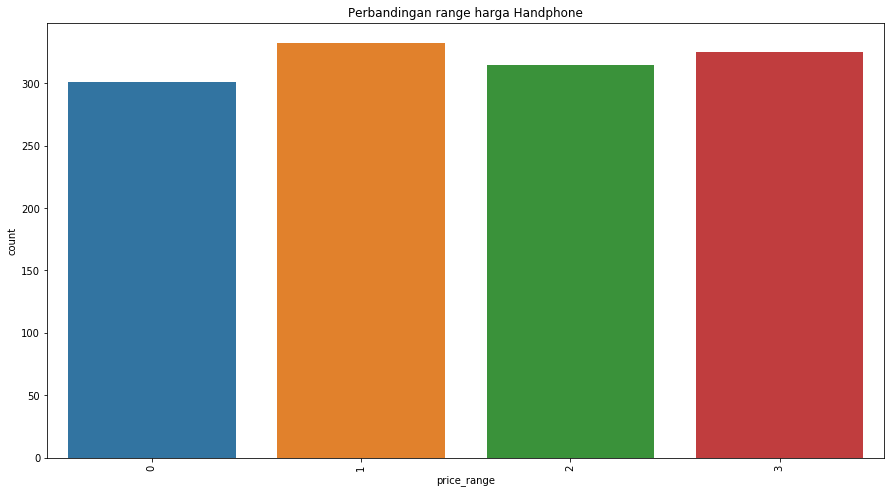

In [28]:
plt.figure(figsize = (15, 8))
sns.countplot(datafix['price_range'])
plt.xticks(rotation = 90)
plt.title('Perbandingan range harga Handphone')
plt.show()

In [30]:
datafix.stb.freq(['four_g'], cum_cols =False)

,four_g,count,percent
0,1,674,52.945797
1,0,599,47.054203


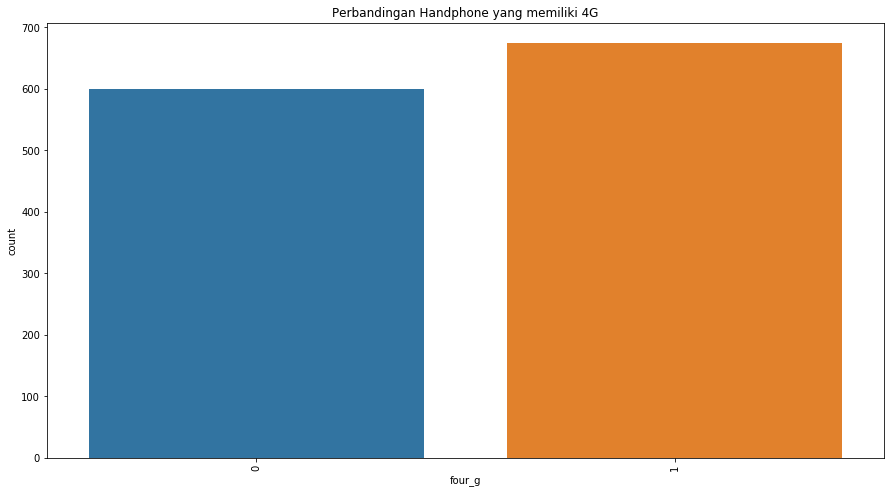

In [29]:
plt.figure(figsize = (15, 8))
sns.countplot(datafix['four_g'])
plt.xticks(rotation = 90)
plt.title('Perbandingan Handphone yang memiliki 4G')
plt.show()

In [33]:
datafix.stb.freq(['three_g'], cum_cols =False)

,three_g,count,percent
0,1,971,76.276512
1,0,302,23.723488


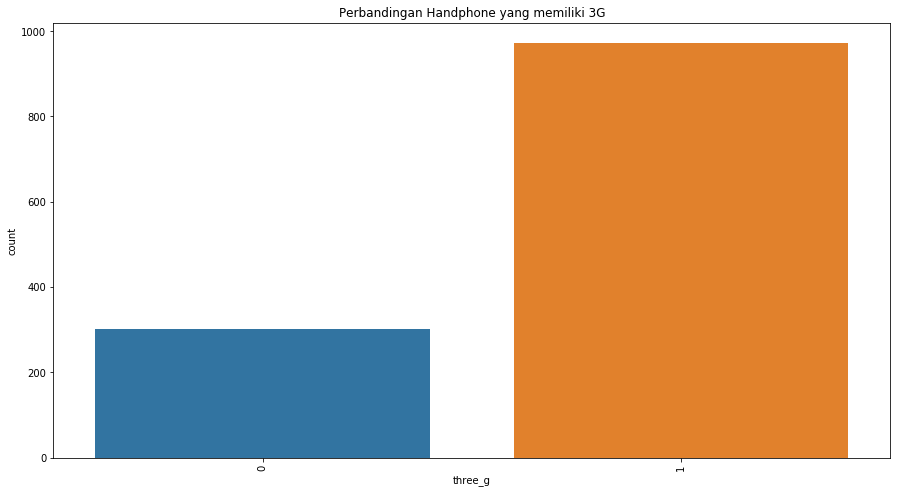

In [31]:
plt.figure(figsize = (15, 8))
sns.countplot(datafix['three_g'])
plt.xticks(rotation = 90)
plt.title('Perbandingan Handphone yang memiliki 3G')
plt.show()

In [35]:
datafix.stb.freq(['wifi'], cum_cols =False)

,wifi,count,percent
0,1,678,53.260016
1,0,595,46.739984


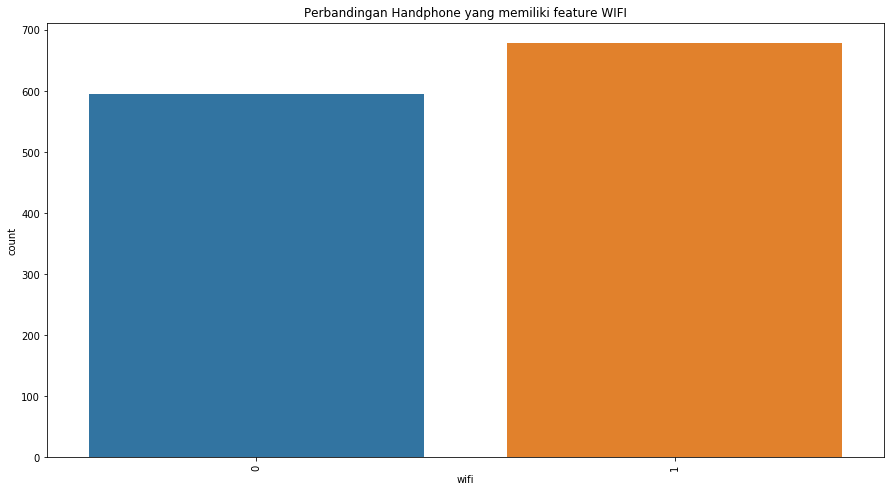

In [32]:
plt.figure(figsize = (15, 8))
sns.countplot(datafix['wifi'])
plt.xticks(rotation = 90)
plt.title('Perbandingan Handphone yang memiliki feature WIFI')
plt.show()

In [36]:
datafix.stb.freq(['dual_sim'], cum_cols =False)

,dual_sim,count,percent
0,0,637,50.039277
1,1,636,49.960723


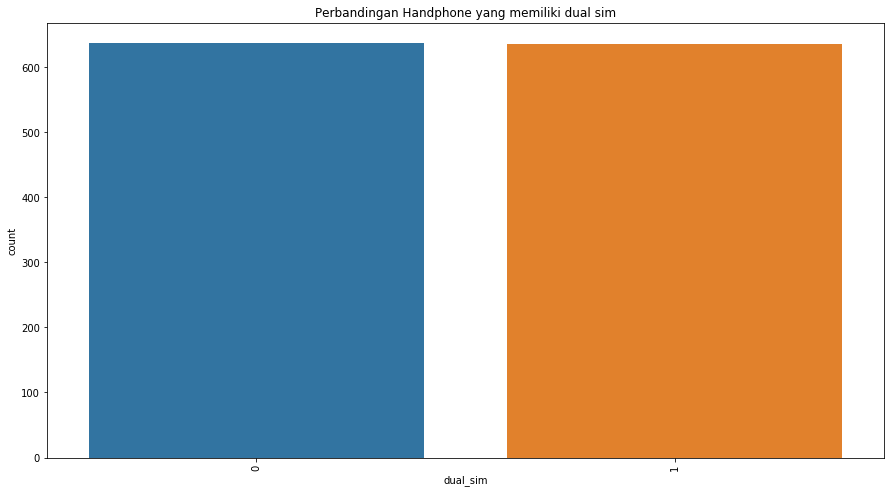

In [33]:
plt.figure(figsize = (15, 8))
sns.countplot(datafix['dual_sim'])
plt.xticks(rotation = 90)
plt.title('Perbandingan Handphone yang memiliki dual sim')
plt.show()

In [37]:
datafix.stb.freq(['blue'], cum_cols =False)

,blue,count,percent
0,1,649,50.981932
1,0,624,49.018068


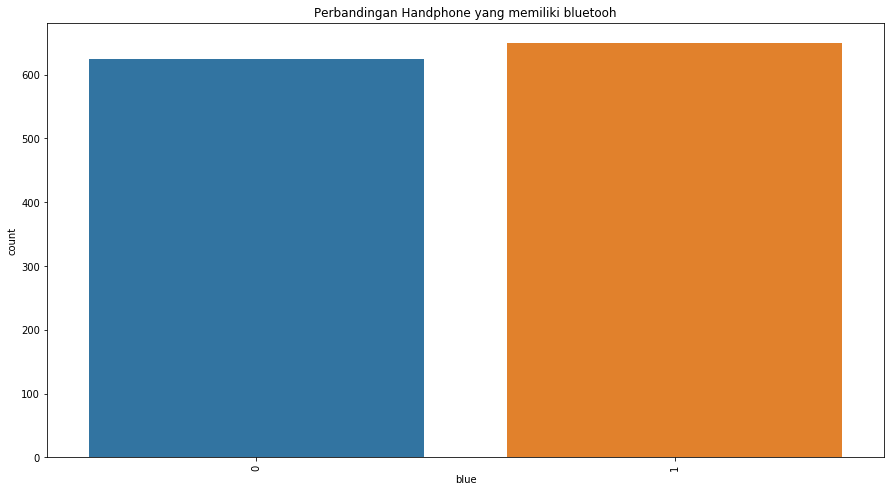

In [34]:
plt.figure(figsize = (15, 8))
sns.countplot(datafix['blue'])
plt.xticks(rotation = 90)
plt.title('Perbandingan Handphone yang memiliki bluetooh')
plt.show()

### Multivariate Analysis

In [59]:
kamera= pd.crosstab(columns=[cam['cat_fc'],cam['cat_pc']], index=cam['price_range'])
kamera

cat_fc      no camera                            low                         \
cat_pc      no camera low average high very high low average high very high   
price_range                                                                   
0                  24  29      17    6         5  40      37   29        19   
1                  16  41      13   10         5  41      61   26        17   
2                  12  33      15    9         2  32      64   15        29   
3                  11  34      14    5         5  43      61   25        22   

cat_fc      average                high           very high  
cat_pc      average high very high high very high very high  
price_range                                                  
0                23   21        21   14         9         7  
1                21   22        19   15        17         8  
2                13   36        22   10        17         6  
3                20   28        22   13        16         6

In [45]:
perfomance= pd.crosstab(index=[datafix['cat_ram'],datafix['cat_core'],datafix['cat_memory']], columns=[datafix['cat_cs'],datafix['price_range']])
perfomance

cat_cs                      low             standard            high         \
price_range                   0   1   2   3        0  1   2   3    0  1   2   
cat_ram cat_core cat_memory                                                   
<1Gb    low      <16         10   1   0   0        3  1   0   0    5  0   0   
                 17-32        7   2   0   0        6  0   0   0    6  0   0   
                 33-48        8   2   0   0        5  1   0   0    6  0   0   
                 49<         11   1   0   0        3  4   0   0    6  0   0   
        standard <16         13   2   0   0        5  0   0   0    4  0   0   
                 17-32       14   2   0   0        7  1   0   0    9  0   0   
                 33-48        6   1   0   0        3  0   0   0   12  2   0   
                 49<          7   0   0   0        4  0   0   0    5  1   0   
        high     <16          9   1   0   0        9  0   0   0    6  0   0   
                 17-32        8   0   0   0        5  0   0   0    6  1   0   
                 33-48        5   0   0   0        0  0   0   0    4  0   0   
                 49<          9   2   0   0        3  1   0   0    4  0   0   
1-2Gb   low      <16          3   9   2   0        3  9   0   0    1  4   0   
                 17-32        1  19   0   0        1  3   0   0    3  5   1   
                 33-48        2  13   2   0        0  6   0   0    2  8   2   
                 49<          1   9   1   0        3  6   2   0    1  6   1   
        standard <16          4   7   2   0        1  8   3   0    0  9   0   
                 17-32        6  11   2   0        6  5   0   0    1  5   1   
                 33-48        0  12   1   0        0  7   3   0    2  5   0   
                 49<          4  11   3   0        2  4   1   0    2  2   1   
        high     <16          0   5   3   0        3  1   2   0    3  5   1   
                 17-32        3   5   1   0        1  1   0   0    2  2   3   
                 33-48        2   7   0   0        2  2   3   0    1  0   1   
                 49<          0   9   3   0        0  1   1   0    2  2   0   
2-3Gb   low      <16          0   3  10   0        0  1   3   2    0  5   7   
                 17-32        0   5  10   1        0  3   5   1    0  1   2   
                 33-48        0   3   5   0        0  4   7   2    0  3   3   
                 49<          0   4   7   1        0  1   7   2    0  2   6   
        standard <16          0   1  11   1        0  1  10   2    0  5   8   
                 17-32        0   3  13   4        0  0   5   3    0  2   2   
                 33-48        0   5  12   5        0  1   6   0    0  2   2   
                 49<          0   3   8   0        0  1   4   2    0  3   8   
        high     <16          0   2   7   2        0  0   7   1    0  0   5   
                 17-32        0   3   5   3        0  5   5   0    0  2   6   
                 33-48        0   4   4   1        0  1   1   2    0  1  11   
                 49<          0   1   7   3        0  2   6   3    0  0   2   
3-4Gb   low      <16          0   0   2   9        0  0   3  11    0  0   0   
                 17-32        0   0   0   6        0  0   0  11    0  0   1   
                 33-48        0   0   3  11        0  0   1  11    0  0   1   
                 49<          0   0   1  14        0  0   1   6    0  0   1   
        standard <16          0   0   2   8        0  0   2   5    0  0   1   
                 17-32        0   0   2  11        0  0   1   6    0  0   0   
                 33-48        0   0   2  11        0  0   0   9    0  0   1   
                 49<          0   0   2  11        0  0   0   9    0  0   4   
        high     <16          0   0   2  10        0  0   0   6    0  0   0   
                 17-32        0   0   1  11        0  0   2   2    0  0   1   
                 33-48        0   0   1   9        0  0   0   3    0  0   1   
                 49<          0   0   1   8       

In [54]:
ojol = pd.crosstab(index=[datafix['cat_battery'],datafix['four_g']], columns=datafix['price_range'])
ojol

price_range,0,1,2,3
cat_battery,,,,
low,136,121,125,79
normal,97,110,76,110
super saver,68,101,114,136


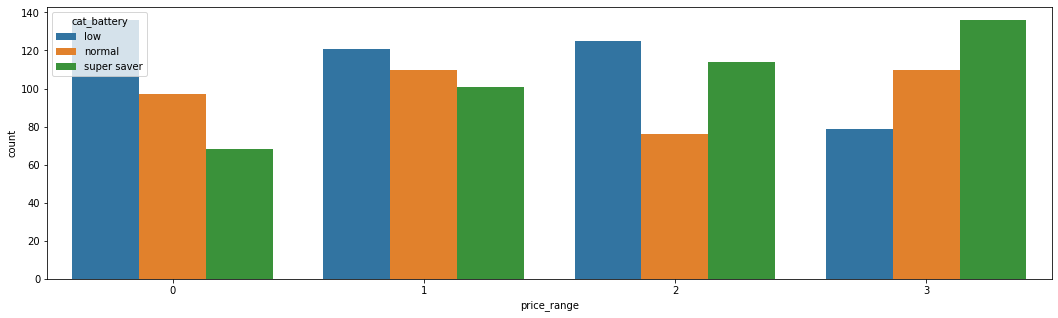

In [55]:
plt.figure(figsize = (18, 5))
sns.countplot(cam['price_range'], hue = cam['cat_battery'])
plt.show()

In [56]:
telemarketer = pd.crosstab(columns=[datafix['cat_battery'],datafix['cat_talk']], index=datafix['price_range'])
telemarketer

cat_battery low               normal               super saver              
cat_talk    low standard high    low standard high         low standard high
price_range                                                                 
0            50       40   46     29       31   37          27       13   28
1            40       34   47     35       29   46          37       26   38
2            43       43   39     27       23   26          40       32   42
3            25       28   26     39       34   37          39       41   56

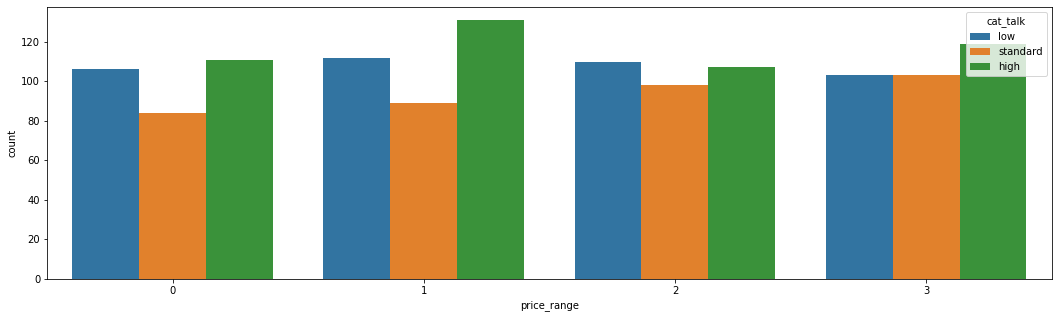

In [57]:
plt.figure(figsize = (18, 5))
sns.countplot(cam['price_range'], hue = cam['cat_talk'])
plt.show()

## Kesimpulan

Dari hasil Eksplorasi Data Analysis pada dataset Mobile pricing, dapat disimpulkan bahwa:
1. Penjualan Handphone yang memiliki feature  Touch Screen ada sekitar 51 % 
2. Penjualan Handphone yang memiliki feature Camera ada sekitar 95 % 
3. Range harga dari penjualan handphone cukup balance, dengan paling banyak ada di range 1(average) 26%
4. Penjualan Handphone yang memiliki feature 4G ada sekitar 52,9% 
5. Penjualan Handphone yang memiliki feature 3G ada sekitar 76,3% 
6. Penjualan Handphone yang memiliki feature Wifi ada sekitar 53.2% 
7. Penjualan Handphone yang memiliki feature Dual Sim ada sekitar 50%  
8. Penjualan Handphone yang memiliki feature Bluetooth ada sekitar 50,9% 

Lalu dengan mengelompokan tipe tipe handphone, saya mengelompokan menjadi 4 macam, yaitu :
 1. Untuk orang yang suka melakukan Foto 
   - Harga yang ditawarkan Handphone dengan feature kamera yang kualitasnya sangat bagus di camera depan ataupun belakang sangat beragam, sehingga dijual di range 3 pun masih bisa
   - Jika ingin memiliki kualitas kamera belakang yang bagus dengan kamera depan yang standar, disetiap range harga ada, sehingga saya rekomendasi untuk dijual dirange 1, agar tidak terjadi ketimpangan dengan yang memiliki kamera bagus didepan maupun belakang

2. Untuk orang yang mementingkan perfomance handphone  dengan tolak ukur yang digunakan adalah  Ram 3-4GB, dengan core yang tinggi, memory diatas 49GB, dan clock speednya tinggi, bisa dijual dirange 3 (very high) karena feature tersebut variasinya paling banyak dirange 3

3. untuk ojol yang membutuhkan jaringan 4G dan baterai yang sangat awet, bisa dijual dirange 3(very high) karena feature tersebut variasinya paling banyak dirange 3

4. Untuk Telemarketer yang membutuhkan handphone yang baterainya tahan lama dan bisa dipakai untuk telfon berkali kali, bisa dijual dirange 3(very high) karena feature tersebut variasinya paling banyak dirange 3